In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import gentrl
import numpy as np

import susi
from susi.SOMPlots import plot_estimation_map, plot_som_histogram, plot_umatrix

In [42]:
df = pd.read_csv("./train_ligase_2_filtered.csv")
#df = df[(df["Standard Units"] == "%") | (df["Standard Units"] == "nM")]
#df = df[df["Standard Units"] == "%"]

C:\Users\mored\Miniconda3\envs\leishnn\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,14,17,18,19,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
smiles = []
for i in df["Smiles"]:
    smiles.append(gentrl.tokenizer.encode([i])[0][0])

In [44]:
smiles = np.array([i.numpy() for i in smiles])

In [45]:
sort = df[df["Standard Units"] == "nM"]

In [48]:
values = list(df["Standard Value"]/max(list(df["Standard Value"])))

In [49]:
biggest = max(list(sort["Standard Value"]))

for i, row in enumerate(df["Standard Value"]):
    if row < 0:
        values[i] = -1
    elif df["Standard Units"][i] != "nM":
        values[i] = -1
    else:
        try:
            values[i]= -math.log(df["Standard Value"][i]/biggest)
        except:
             values[i] = -1

In [25]:
import math
ic50 = []
biggest = max(list(sort["Standard Value"]))
for i, row in enumerate(df["Standard Units"]):
    if row == "%":
        ic50.append(0)
    elif row == "nM":
        try:
            ic50.append(
                -math.log(
                    df["Standard Value"][i]/biggest
                )
            )
        except:
             ic50.append(0)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(smiles), np.array(values),
    test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45644, 50) (5072, 50) (45644,) (5072,)


In [448]:
som = susi.SOMRegressor(
    n_rows=60,
    n_columns=60,
    n_iter_unsupervised=1000000,
    n_iter_supervised=1000000,
    missing_label_placeholder=-1,
    #neighborhood_mode_unsupervised="root",
    #neighborhood_mode_supervised="root",
    learn_mode_unsupervised="min",
    learn_mode_supervised="min",
    learning_rate_start=0.5,
    learning_rate_end=0.05,
    random_state=None,
    n_jobs=1)

In [449]:
som.fit(X_train, y_train)

SOMRegressor(missing_label_placeholder=-1, n_columns=60,
             n_iter_supervised=1000000, n_iter_unsupervised=1000000, n_jobs=1,
             n_rows=60)

In [60]:
x_Test = []
y_Test = []
for i,v in enumerate(y_test):
    if v > 0:
        y_Test.append(v)
        x_Test.append(X_test[i])

In [69]:
x = []
y = []
for i,v in enumerate(values):
    if v > 0:
        y.append(v)
        x.append(smiles[i])

In [70]:
#y_pred = som.predict(x_Test)
y_pred_train = som.predict(x)

print("Train: {0:.1f} %".format(r2_score(y, y_pred_train)*100))
#print("Test: {0:.1f} %".format(r2_score(y_Test, y_pred)*100))

Train: 55.0 %


In [348]:
y_train[31],y_pred_train[31]

(0.056895430151244104, 0.09681841016882288)

In [456]:
import requests

url = "https://notificationer.glitch.me/notify"

payload = "{ \"id\":\"k1r9fznrir0wwxgf5j7nx\", \"text\":\"Project Ready!\" }"
headers = {
    'Content-Type': "application/json",
    'Authorization': "Basic Og=="
    }

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

OK


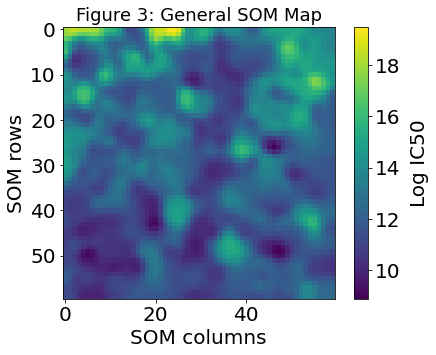

In [6]:
estimation_map = np.squeeze(som.get_estimation_map())
plot_estimation_map(
    estimation_map, cbar_label="Log IC50", cmap="viridis")
plt.title("Figure 3: General SOM Map",  fontsize=18)
plt.show()

In [457]:
pickle.dump(som, open("general_leish_som_1M.p", "wb"))

In [2]:
som = pickle.load(open("general_leish_som_500K.p", "rb"))

In [78]:
som.predict([list(x[0])])[0]

11.569821233577905